In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
# Importing necesarry libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,  Dense, Dropout, Input

In [3]:
# To ensure GPU is present
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0 :
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')

else:
  print('GPU unavailable')


GPU is Available!


In [4]:
# Load and explore the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [5]:
# List all classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display all classes
print(f'Number of classes : {num_classes}')
print(f'Classes : {classes}')

# 0 ->> no fire
# 1 ->> fire

Number of classes : 2
Classes : ['nofire', 'fire']


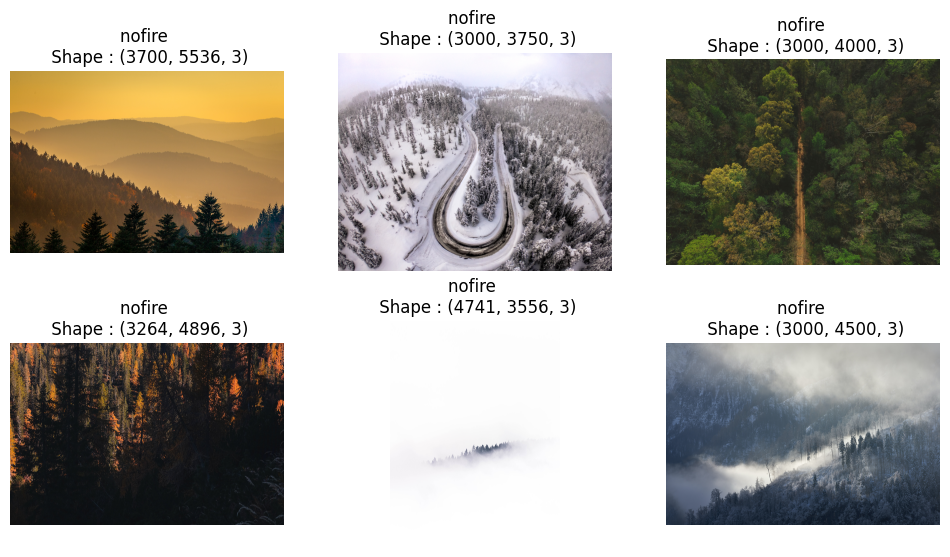

In [6]:
# Lets visualize the image in the dataset
plt.figure(figsize=(12,10))
for i in range(6):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n Shape : {img.shape}')
  plt.axis('off')
plt.show()

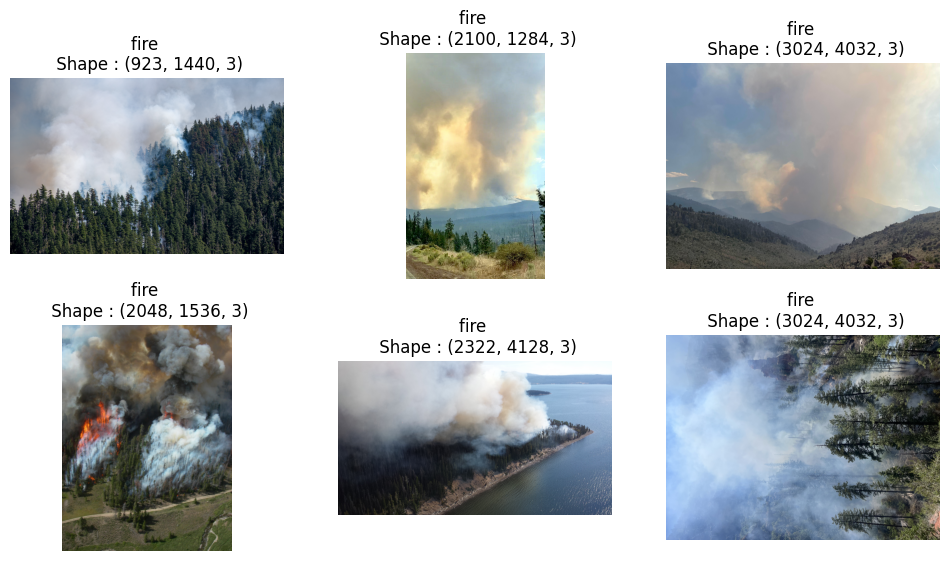

In [7]:
# Lets visualize the image in the dataset
plt.figure(figsize=(12,10))
for i in range(6):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n Shape : {img.shape}')
  plt.axis('off')
plt.show()

In [8]:
# Preprocessing
# Img dimensions and batch size

img_width, img_height = 150,150
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator( rescale= 1./255)
val_datagen = ImageDataGenerator( rescale= 1./255)
test_datagen = ImageDataGenerator( rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = ( img_width , img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = ( img_width , img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = ( img_width , img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [9]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [10]:
# Building CNN model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512 , activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
50/58 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.6038 - loss: 0.9168 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6073 - loss: 0.8862

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 508s 9s/step - accuracy: 0.6078 - loss: 0.8828 - val_accuracy: 0.6849 - val_loss: 0.5434
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7812 - loss: 0.4929

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7812 - loss: 0.4929 - val_accuracy: 0.6901 - val_loss: 0.5335
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 467s 8s/step - accuracy: 0.7313 - loss: 0.5193 - val_accuracy: 0.7760 - val_loss: 0.4482
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7188 - loss: 0.5363 - val_accuracy: 0.7604 - val_loss: 0.4730
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 509s 9s/step - accuracy: 0.8004 - loss: 0.4523 - val_accuracy: 0.7422 - val_loss: 0.5030
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6875 - loss: 0.4465 - val_accuracy: 0.7370 - val_loss: 0.4956
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 501s 8s/step - accuracy: 0.7706 - loss: 0.4937 - val_accuracy: 0.7708 - val_loss: 0.4557
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7812 - loss: 0.4179 - val_accuracy: 0.7734 - val_loss: 0.4607
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 504s 8s/step - accuracy: 0.8051 - loss: 0.4421 - val_accuracy: 0.7682 - val_loss: 0.441

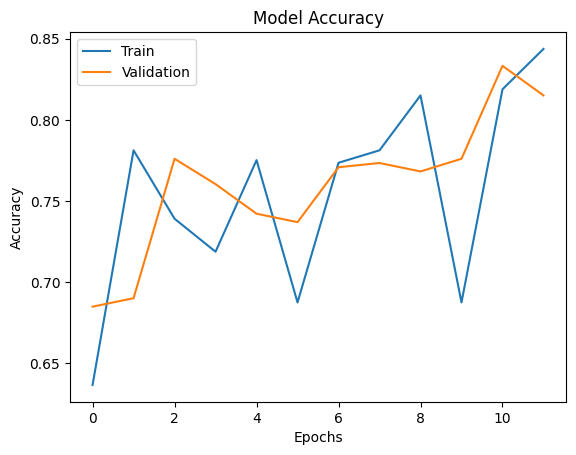

In [13]:
# Evaluate the model - plotting traing and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()


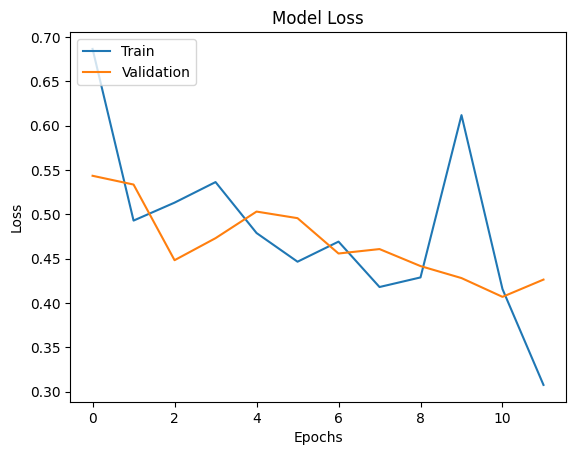

In [14]:
# Evaluate the model - plotting traing and validation losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()


In [15]:
# Evaluate the model using test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy : {test_acc:.4f}')

 3/12 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.8090 - loss: 0.4411 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/12 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.8258 - loss: 0.4063

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


11/12 ━━━━━━━━━━━━━━━━━━━━ 7s 8s/step - accuracy: 0.8269 - loss: 0.4035 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 93s 8s/step - accuracy: 0.8275 - loss: 0.4012
Test Accuracy : 0.8307


In [16]:
# Save the model
model.save('FFDv2.keras')
!ls -lh /content/FFDv2.keras


-rw-r--r-- 1 root root 218M Apr 18 04:55 /content/FFDv2.keras


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFDv2.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  # 1 ->> fire
  # 2 ->> no fire

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()


In [26]:
# Listing content of the directory with class fire
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire')

['29071683967_b1ed99cb89_o.jpg',
 '9570772331_0822c9b670_o.jpg',
 'malachi-brooks-lhZ61YqYhnA-unsplash.jpg',
 '28537699003_1a422593ca_o.jpg',
 '51404893429_95e004cb03_o.jpg',
 '26131736898_9e6a8cd68f_o.jpg',
 '50622961901_b344261876_o.jpg',
 '35410741240_4dde737981_o.jpg',
 '20960888741_8c4be2c1df_o.jpg',
 '52230132421_efbcf13fe2_o.png',
 '52291063924_0a29bb857f_o.jpg',
 '9600858470_9d349a2271_o.jpg',
 '52390706166_2ef8a61765_o.jpg',
 '37342470222_39ab7a0005_o.jpg',
 '19196558588_267f24b847_o.jpg',
 '50622019883_c988dcf6ba_o.jpg',
 '33116128054_0169df2131_o.jpg',
 '32923781413_197187fc02_o.jpg',
 '50380847162_24a484981b_o.jpg',
 '52561565423_bbc7b2daf8_o.jpg',
 '27389369514_cd30397ac2_o.jpg',
 '51339519791_6c87189d8b_o.jpg',
 '26549039025_b4cce14ec7_o.jpg',
 '51840740529_300582b71b_o.jpg',
 '36171933842_96ffbd3205_o.jpg',
 '51236039150_95c87d9260_o.jpg',
 '8469662828_371dbcb70d_o.jpg',
 '52871185823_2561dcb25a_o.jpg',
 '28347651877_ce21ed134e_o.png',
 '35436611810_9b938fc10c_o.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


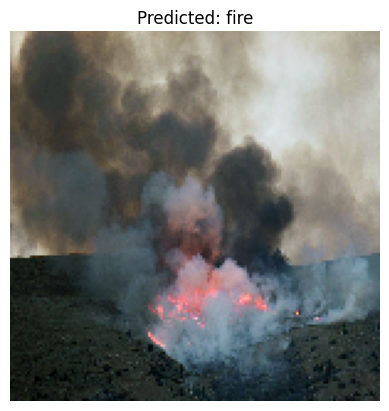

In [25]:
# Passing a test image
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/27951228213_2dd961ac1f_o.jpg')


In [27]:
# Listing content of the directory with class nofire
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


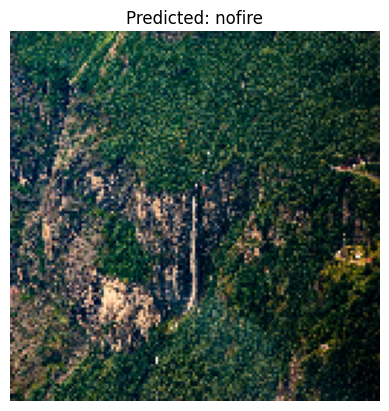

In [30]:
# Passing a test image
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/cosmic-timetraveler-pIfF5Q8AYaE-unsplash.jpg')